In [1]:
#import 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
import seaborn as sb

In [8]:
#load datatsets

decdf = pd.read_csv ('/Users/admin/Desktop/eCommerce Events History in Cosmetics Shop/2019-Dec.csv')
novdf = pd.read_csv ('/Users/admin/Desktop/eCommerce Events History in Cosmetics Shop/2019-Nov.csv')
octdf = pd.read_csv ('/Users/admin/Desktop/eCommerce Events History in Cosmetics Shop/2019-Oct.csv')
jandf = pd.read_csv ('/Users/admin/Desktop/eCommerce Events History in Cosmetics Shop/2020-Jan.csv')
febdf = pd.read_csv ('/Users/admin/Desktop/eCommerce Events History in Cosmetics Shop/2020-Feb.csv')

In [9]:
#concate the datasets for 5 month period into 1 df

ecommdf = pd.concat([decdf, novdf, octdf, jandf,febdf])

In [10]:

#Outlier detection

%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [18]:
#Due to the inability to use the lage volume of datre, we will be redusing the dimension (columns) of the dataframe.
ecommdfb = ecommdf.drop(['user_id','category_id','category_code','user_session' ], axis =1)

In [20]:
ecommdfb.columns =['event_time','event_type','product_id','brand','price']
data = ecommdfb.iloc[:, 0:4]
target =ecommdfb.iloc[:,4]
ecommdfb [:4]

,event_time,event_type,product_id,brand,price
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,f.o.x,6.27
1,2019-12-01 00:00:00 UTC,view,5764655,cnd,29.05
2,2019-12-01 00:00:02 UTC,cart,4958,runail,1.19
3,2019-12-01 00:00:05 UTC,view,5848413,freedecor,0.79


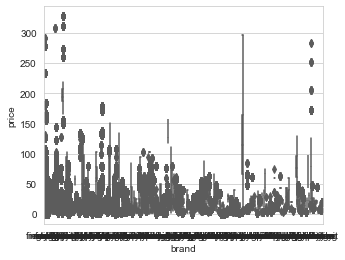

In [22]:


sb.boxplot(x = 'brand',y='price', data = ecommdfb, palette = 'hls')

In [26]:
#The volume of the dataset is too large to use box hence from below we cansee that the minimum pricew is -7.937000e+01​.
#prices are not expected to be negative.
#Describe ecommdf
ecommdf.describe()

,product_id,category_id,price,user_id
count,1.820813e+07,1.820813e+07,1.820813e+07,1.820813e+07
mean,5.485742e+06,1.554139e+18,8.481754e+00,5.210998e+08
std,1.302813e+06,1.692711e+17,1.933228e+01,8.779838e+07
min,3.752000e+03,1.487580e+18,-7.937000e+01,4.654960e+05
25%,5.724660e+06,1.487580e+18,2.060000e+00,4.807547e+08
50%,5.811419e+06,1.487580e+18,4.000000e+00,5.524993e+08
75%,5.857676e+06,1.487580e+18,6.980000e+00,5.765523e+08
max,5.932595e+06,2.242903e+18,3.277800e+02,6.220902e+08


In [4]:
ecommdf.head()


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1.487580e+18,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1.487580e+18,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1.487580e+18,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1.487580e+18,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1.487580e+18,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


In [5]:
#Display attributes and datatypes
ecommdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18208129 entries, 0 to 4156681
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.4+ GB


In [6]:
#DEscribe the data
ecommdf.describe()


,product_id,category_id,price,user_id
count,1.820813e+07,1.820813e+07,1.820813e+07,1.820813e+07
mean,5.485742e+06,1.554139e+18,8.481754e+00,5.210998e+08
std,1.302813e+06,1.692711e+17,1.933228e+01,8.779838e+07
min,3.752000e+03,1.487580e+18,-7.937000e+01,4.654960e+05
25%,5.724660e+06,1.487580e+18,2.060000e+00,4.807547e+08
50%,5.811419e+06,1.487580e+18,4.000000e+00,5.524993e+08
75%,5.857676e+06,1.487580e+18,6.980000e+00,5.765523e+08
max,5.932595e+06,2.242903e+18,3.277800e+02,6.220902e+08


In [7]:
ecommdf.describe(include = np.object)

,event_time,event_type,category_code,brand,user_session
count,18208129,18208129,313491,10523040,18204082
unique,7599657,4,12,273,3937328
top,2020-02-15 16:08:37 UTC,view,appliances.environment.vacuum,runail,74206ba1-c863-4760-bbdc-b11777059e46
freq,3087,8427656,131771,1348995,5411


In [8]:
#show details of users interacions(events) on the site
ecommdf['event_type'].value_counts () 



view                8427656
cart                5124961
remove_from_cart    3519033
purchase            1136479
Name: event_type, dtype: int64

In [9]:
#show details of users interacions(events) on the site for each month
from IPython.display import display
display(decdf['event_type'].value_counts ())
display(novdf['event_type'].value_counts ()) 
display(octdf['event_type'].value_counts ())
display(jandf['event_type'].value_counts ())
display(febdf['event_type'].value_counts ())




view                498166
cart                283752
remove_from_cart    204009
purchase             62648
Name: event_type, dtype: int64

view                2076132
cart                1311807
remove_from_cart     925481
purchase             322417
Name: event_type, dtype: int64

view                1862164
cart                1232385
remove_from_cart     762110
purchase             245624
Name: event_type, dtype: int64

view                2037608
cart                1148323
remove_from_cart     815024
purchase             263797
Name: event_type, dtype: int64

view                1953586
cart                1148694
remove_from_cart     812409
purchase             241993
Name: event_type, dtype: int64

Text(0.5, 1.0, 'Event Type')

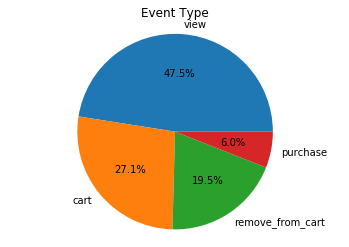

In [10]:

Decevent_type = ['view','cart','remove_from_cart','purchase']
value_counts = [498166, 283752, 204009, 62648]

fig, decdf = plt.subplots()
decdf.pie(value_counts, labels = Decevent_type, autopct = '%1.1f%%')             
decdf.axis('equal')
decdf.set_title('Event Type')

Text(0.5, 1.0, 'Event Type for February 2020')

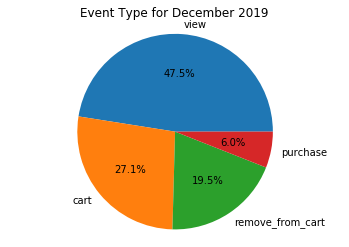

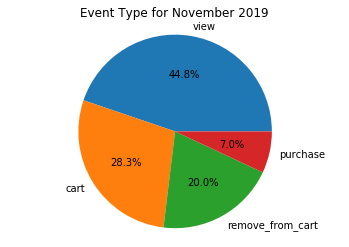

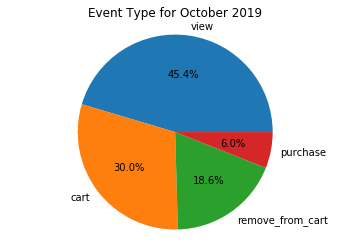

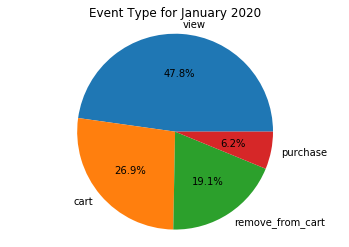

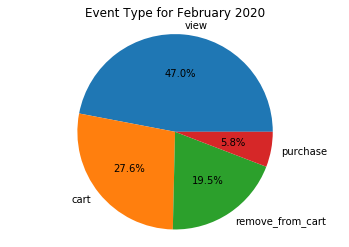

In [11]:

Decevent_type = ['view','cart','remove_from_cart','purchase']
value_counts = [498166, 283752, 204009, 62648]

fig, decdf = plt.subplots()
decdf.pie(value_counts, labels = Decevent_type, autopct = '%1.1f%%')             
decdf.axis('equal')
decdf.set_title('Event Type for December 2019')


Novevent_type = ['view','cart','remove_from_cart','purchase']
value_counts = [2076132, 1311807, 925481, 322417]

fig, novdf = plt.subplots()
novdf.pie(value_counts, labels = Novevent_type, autopct = '%1.1f%%')             
novdf.axis('equal')
novdf.set_title('Event Type for November 2019')


Octevent_type = ['view','cart','remove_from_cart','purchase']
value_counts = [1862164, 1232385, 762110, 245624]

fig, octdf = plt.subplots()
octdf.pie(value_counts, labels = Octevent_type, autopct = '%1.1f%%') 
octdf.axis('equal')
octdf.set_title('Event Type for October 2019')


Janevent_type = ['view','cart','remove_from_cart','purchase']
value_counts = [2037608, 1148323, 815024, 263797]

fig, jandf = plt.subplots()
jandf.pie(value_counts, labels = Janevent_type, autopct = '%1.1f%%')             
jandf.axis('equal')
jandf.set_title('Event Type for January 2020')




event_type = ['view','cart','remove_from_cart','purchase']
value_counts = [1953586, 1148694, 812409, 241993]

fig, febdf = plt.subplots()
febdf.pie(value_counts, labels = event_type, autopct = '%1.1f%%')             
febdf.axis('equal')
febdf.set_title('Event Type for February 2020')


In [12]:
#Most popular products among users in descending order
ecommdf ['product_id'].value_counts()

5809910    115742
5809912     47875
5700037     45012
5854897     39696
5802432     39152
            ...  
5757521         1
5693848         1
5662783         1
5662754         1
5616969         1
Name: product_id, Length: 54152, dtype: int64

In [21]:
#Top 10 Popular brands for the 5-month period
Popular_brands = ecommdf['brand'].value_counts()
Popular_brands.head(10)


runail       1348995
irisk         928932
masura        788203
grattol       740615
ingarden      387742
bpw.style     383395
estel         303627
kapous        271074
uno           221589
jessnail      216006
Name: brand, dtype: int64

Text(0.5, 1.0, 'Top Ten Brands')

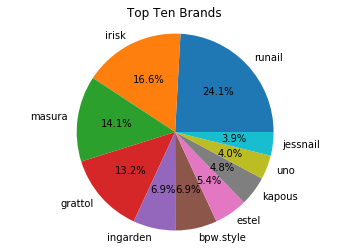

In [28]:
Popular_brands = ['runail','irisk','masura','grattol','ingarden','bpw.style','estel','kapous','uno','jessnail']
value_counts = ['1348995', '928932', '788203', '740615','387742','383395','303627','271074','221589','216006']

fig, popular_brands = plt.subplots()
popular_brands.pie(value_counts, labels = Popular_brands, autopct = '%1.1f%%')             
popular_brands.axis('equal')
popular_brands.set_title('Top Ten Brands')

In [29]:
#products purchased by brand name
Products_purchased = ecommdf.loc[ecommdf.event_type == 'purchase']
Products_purchased


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
557,2019-12-01 00:17:50 UTC,purchase,4554,1.487580e+18,NaN,runail,0.38,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9
558,2019-12-01 00:17:50 UTC,purchase,4600,1.487580e+18,NaN,runail,0.38,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9
559,2019-12-01 00:17:50 UTC,purchase,4607,1.487580e+18,NaN,runail,0.38,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9
560,2019-12-01 00:17:50 UTC,purchase,4640,1.487580e+18,NaN,runail,0.37,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9
561,2019-12-01 00:17:50 UTC,purchase,4689,1.487580e+18,NaN,runail,0.38,473613801,d1e90c6a-c030-4d06-aaaf-6d12ec502bb9
...,...,...,...,...,...,...,...,...,...
4156349,2020-02-29 23:46:01 UTC,purchase,5896420,1.487580e+18,NaN,jessnail,49.21,620865261,64389dba-26c4-f328-6972-166a48654eaa
4156563,2020-02-29 23:54:44 UTC,purchase,5692863,1.487580e+18,NaN,yoko,7.83,548866558,199869f5-3a22-4a47-8678-7c343d09bb8e
4156564,2020-02-29 23:54:44 UTC,purchase,5802432,1.487580e+18,NaN,NaN,0.32,548866558,199869f5-3a22-4a47-8678-7c343d09bb8e
4156565,2020-02-29 23:54:44 UTC,purchase,5896788,1.783999e+18,NaN,staleks,4.75,548866558,199869f5-3a22-4a47-8678-7c343d09bb8e


In [30]:
#Top 50 Users (Customers)
Top_customers = Products_purchased.groupby('user_id').user_id.agg([len]).sort_values(by= 'len', ascending = False)
Top_customers.head(50)

,len
user_id,
480463194,654
469299888,575
556579890,506
601469771,461
557790271,438
381816972,419
566439116,409
431950134,400
517825140,387


In [31]:
#Best time users make purchases( to target them with recommendations and adverts)
Best_sales_time = Products_purchased.groupby('event_time').event_time.agg([len]).sort_values(by= 'len', ascending = False)
Best_sales_time.head(20)

,len
event_time,
2020-02-09 20:10:58 UTC,429
2020-02-26 05:38:37 UTC,324
2020-02-20 14:59:05 UTC,282
2019-11-18 01:17:08 UTC,279
2019-12-02 14:12:08 UTC,260
2020-01-09 09:06:06 UTC,257
2019-11-07 12:31:32 UTC,252
2019-12-02 20:42:26 UTC,246
2020-02-13 14:28:17 UTC,240


In [46]:
#length of ecommrdf 
len(ecommdf)

18208129

In [47]:
#Number of unique users(customers)
users = ecommdf['user_id'].unique()
len(users)

1449110

In [48]:

#Number of unique products
products = ecommdf['product_id'].unique()
len(products)

54152

In [49]:
#Number of unique products
products = ecommdf['product_id'].unique()
len(products)

54152

In [33]:
ecommdf.corr()

,product_id,category_id,price,user_id
product_id,1.000000,0.033161,-0.021833,-0.015164
category_id,0.033161,1.000000,0.013409,0.016649
price,-0.021833,0.013409,1.000000,0.035023
user_id,-0.015164,0.016649,0.035023,1.000000


In [43]:
#explore and preprocess df for weka

ecommdf1 = ecommdf.drop(['event_time', 'category_id','category_code','user_session' ], axis =1)

In [44]:
#since prices cannot be begative, we exclude all prices less than 1
ecommdf2= ecommdf1[ecommdf1.price >= 1]

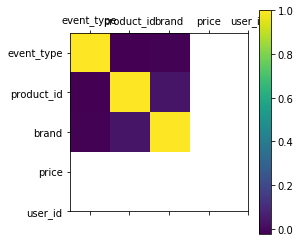

In [45]:
plt.matshow(ecommdf1.corr())
plt.xticks(range(len(ecommdf1.columns )), ecommdf1.columns)
plt.yticks(range(len(ecommdf1.columns)), ecommdf1.columns)
plt.colorbar()
plt.show()

In [78]:
ecommdfR = ecommdf.drop(['event_time','category_id','category_code','user_session' ], axis =1)



In [79]:
## To build the recommender system event_type will be ranked in order of interest and stored as ratings in a new column.
ecommdfR ['rating'] = ecommdf['event_type'].map({'remove_from_cart' :1, 'view': 2, 'cart': 3, 'purchase':4})
ecommdfR.head()


,event_type,product_id,brand,price,user_id,rating
0,remove_from_cart,5712790,f.o.x,6.27,576802932,1
1,view,5764655,cnd,29.05,412120092,2
2,cart,4958,runail,1.19,494077766,3
3,view,5848413,freedecor,0.79,348405118,2
4,view,5824148,NaN,5.56,576005683,2


In [80]:
ecommdfRS = ecommdfR.drop(['event_type' ], axis =1)
ecommdfRS.head()

,product_id,brand,price,user_id,rating
0,5712790,f.o.x,6.27,576802932,1
1,5764655,cnd,29.05,412120092,2
2,4958,runail,1.19,494077766,3
3,5848413,freedecor,0.79,348405118,2
4,5824148,NaN,5.56,576005683,2


In [81]:
#To drop duplicated records
ecommdfRS = ecommdfRS.drop_duplicates()

In [82]:
#since prices cannot be begative, we exclude all prices less than 1
ecommdfRSp= ecommdfRS[ecommdfRS.price >= 1]

In [83]:
#Before starting with the correlation calculation, we need to have all ratings of a film in columns
#the rows will represent the users and the data in the table will be the ratings.
# For this we can use the function pivot_table of pandas as below:

ecommdfRSP = ecommdfRSp.pivot_table(index = 'user_id', columns = 'brand', values = 'rating')
ecommdfRSP.head(20)

brand,airnails,almea,andrea,ardell,arganoil,art-visage,artex,aura,australis,avene,...,voesh,vosev,weaver,yllozure,yoko,ypsed,yu-r,zab,zeitun,zinger
user_id,,,,,,,,,,,,,,,,,,,,,
465496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1120748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1458813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2038666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3571443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4103071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4230352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4661182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5151616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
X = ecommdfRSP['runail']

In [85]:
corr = ecommdfRSP.corrwith(X)

C:\Users\admin\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\admin\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [86]:
matrix_corr = ecommdfRSP.corr(method = 'pearson', min_periods = 100)
matrix_corr.head()

brand,airnails,almea,andrea,ardell,arganoil,art-visage,artex,aura,australis,avene,...,voesh,vosev,weaver,yllozure,yoko,ypsed,yu-r,zab,zeitun,zinger
brand,,,,,,,,,,,,,,,,,,,,,
airnails,1.000000,NaN,NaN,0.052532,NaN,0.266034,0.355888,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.299092,NaN,NaN,NaN,NaN,0.308560
almea,NaN,1.00000,NaN,0.537190,NaN,0.325588,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.079167,NaN,NaN,NaN,0.519179,0.170872
andrea,NaN,NaN,1.000000,0.556895,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ardell,0.052532,0.53719,0.556895,1.000000,NaN,0.339149,0.155529,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.276000,NaN,NaN,NaN,0.055772,0.167848
arganoil,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
user_corr = pd.Series()

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [88]:
ecommdfRSP.iloc[0].dropna()

brand
cnd    2.0
Name: 465496, dtype: float64

In [89]:
user_id = 0

In [90]:

for brand in ecommdfRSP.iloc[user_id].dropna().index:
    corr_list = matrix_corr[brand].dropna()*ecommdfRSP.iloc[user_id][brand]

In [91]:
user_corr = user_corr.append(corr_list)

In [92]:
brand_list =[]
for i in range(len(ecommdfRSP.iloc[user_id].dropna().index)):
    if ecommdfRSP.iloc[user_id].dropna().index[i] in user_corr:
        brand_list.append(ecommdfRSP.iloc[user_id].dropna().index[i])
    else:
        pass
    user_corr = user_corr.drop(brand_list)

In [93]:

print('Hi, based on the brand that you have bought: \n')
for i in ecommdfRSP.iloc[user_id].dropna().index:
    print(i)
print( '\n you would definitely love these brands \n')
for i in user_corr.sort_values(ascending = False). index[:5]:
    print(i)

Hi, based on the brand that you have bought: 

cnd

 you would definitely love these brands 

inm
beautix
bespecial
joico
freshbubble


## To build the recommender system event_type will be ranked in order of interest and stored as ratings in a new column.
ecommdf2 ['rating'] = ecommdf2['event_type'].map({'remove_from_cart' :1, 'view': 2, 'cart': 3, 'purchase':4})
ecommdf2.head()


In [ ]:
#drop event_type
ecommdfW= ecommdf2.drop(['event_type' ], axis =1)

In [ ]:
#save on directory for weka
ecommdfW.to_csv('ecommdfW.csv', index = False)

In [ ]:
ecommdf3m = pd.concat([decdf, novdf, octdf])
ecommdf3m.head()

In [ ]:
#Due to memomy contrains in weka, we reduce the number of months from 5 to 2 namely Dec 2019,November 2019 and Oct 2019.


In [ ]:
ecommdf13m = ecommdf3m.drop(['event_time','user_id','category_id','category_code','user_session' ], axis =1)

In [ ]:
## To build the recommender system event_type will be ranked in order of interest and stored as ratings in a new column.
ecommdf13m ['rating'] = ecommdf3m['event_type'].map({'remove_from_cart' :1, 'view': 2, 'cart': 3, 'purchase':4})
ecommdf13m.head()

In [ ]:
ecommdf23m = ecommdf13m.drop(['event_type' ], axis =1)
ecommdf23m.head()

In [ ]:
#since prices cannot be begative, we exclude all prices less than 1
ecommdf23m= ecommdf13m[ecommdf13m.price >= 1]

In [ ]:
#drop event_type
ecommdfW3m= ecommdf23m.drop(['event_type' ], axis =1)

In [ ]:
#save on directory for weka
ecommdfW3m.to_csv('ecommdfW3m.csv', index = False)